<a href="https://colab.research.google.com/github/Pragna235/Wine_Quality_Prediction/blob/main/Red_Wine_Quality_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Prediction Project

# Importing Libraries

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [84]:
wine_dataset = pd.read_csv('/content/winequality-red.csv')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [85]:
wine_dataset.shape

(1599, 12)

Here, number of attributes or features = 12, out of which 11 are our input features and the last one is our target variable.

In [86]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Description

In [87]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Finding Null Values

In [88]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

This shows that, our dataset doesn't contain any null values. This makes our work a little easier.

In [89]:
wine_dataset.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


# Data Visualization and Analysis

# Countplot

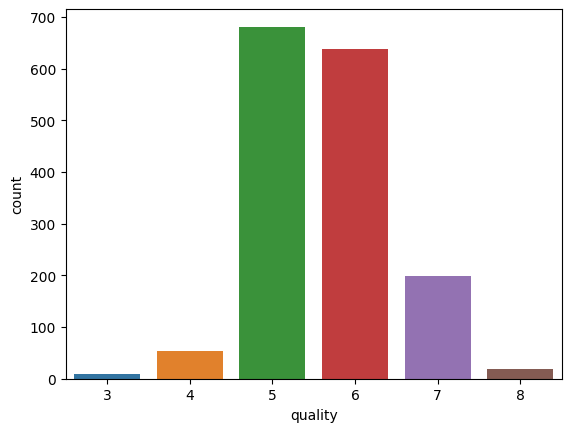

In [90]:
sns.countplot(x='quality',data=wine_dataset)
plt.show()

From the above, we can say that majority of our observations are from class 5 and 6

<Axes: xlabel='quality', ylabel='volatile acidity'>

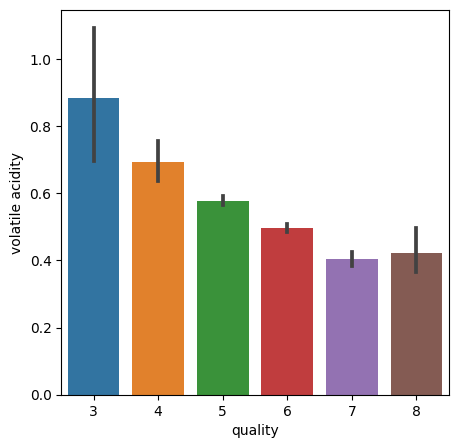

In [91]:
# volatile acidiy vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity',data=wine_dataset)

From this, we can say that, if the volatile acidity value is high, then the qulaity of wine is low and vice versa for most of the cases.i.e., they are inversely proportional.

<Axes: xlabel='quality', ylabel='citric acid'>

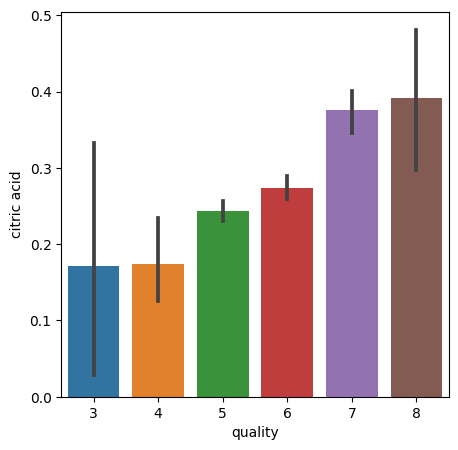

In [92]:
# citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid',data=wine_dataset)

Here, we observe that if the citric acid value is high, then the quality of wine is also high. i.e., they are directly proportional.

# Correlation

1. Positive Correlation - Directly Proportional
2. Negative Correlation - Inversely Proportional

In [93]:
# Find the correlation of all the columns to quality
correlation = wine_dataset.corr()

<Axes: >

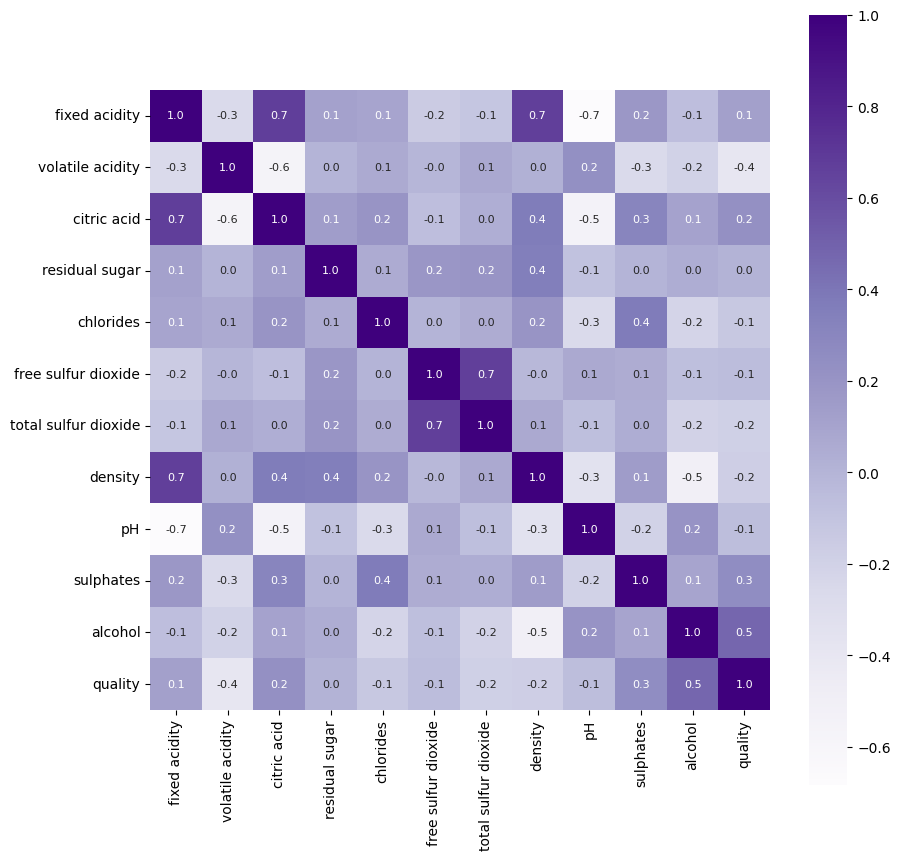

In [94]:
# Constructing a heat map to understand the correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True,fmt='.1f', annot=True,annot_kws={'size':8},cmap='Purples')

# Data Preprocessing

In [95]:
# Separate the Data and Label
X = wine_dataset.drop('quality',axis=1) # input

In [96]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Label Encoding

Here, the wine is considered to be good, when the quality of the wine >= 7,
else, the wine is considered to be bad

In [97]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) # output

In [98]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

# Train and Test Splitting

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [100]:
print(Y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


In [101]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


# Training the Model
Using Random Forest Classifier

In [102]:
model = RandomForestClassifier()

In [103]:
model.fit(X_train, y_train)

RandomForestClassifier()

# Model Evaluation
Accuracy Score

In [104]:
# Accuracy on test data
predictions = model.predict(X_test)

In [105]:
accuracy_score(y_test,predictions)

0.921875

It's almost 93 % accurate.

# Building a Predictive System

In [106]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing the input data to a numpy array
input_data_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
#print(prediction)

if(prediction[0]==1):
  print("Good Quality Wine")
else:
  print("Bad Quality Wine")

Good Quality Wine


The initial labelled output for the given input_data is 7 (quality of wine). TH model predicted the output to be 1. i.e., it predicted the given input_data to be a good quality wine.

Give your own input_data with labelled outputs, and check if the model is predicting the correct quality of wine or not